## Computational Guided Inquiry for Polar Research  

## Rovibrational spectra - 2. Remote temperature sensing

### Learning Objectives  
1. Learn how to model the populations of rotational states according to degeneracy and temperature.
2. Learn how to use that population to infer an effective temperature of atmospheric $CO_2$ in a downwelling emission spectrum from South Pole Station, Antarctica.

### Pre-class activities
1. Read the Introduction.  
2. Describe what is meant by the terms _selection rule_ and _forbidden transition_.
3. Write the value of Boltzmann's constant, $k$, in SI units.
4. Write the conversion from wavenumber, cm$^{-1}$, to Joules.


### Introduction

_Climate connection_  
We have learned to identify features in downwelling IR spectra due to greenhouse gases ($CO_2$, $H_2O$, $O_3$, and others), and that these features help us measure the contribution of each gas to the greenhouse effect. We have also learned that in polar regions the spectral features of greenhouse gases are often easier to see than in warmer regions, and that this is because the polar atmosphere is so dry. These observations highlight the unique role offered by polar regions for using downwelling radiance spectra to examine the greenhouse effect.

For this CGI, you'll pursue one such opportunity. There is a band due to $CO_2$, called the $(001) \to (100)$ band, that is so faint that one needs spectra in polar regions to detect it (remember that there is less interference from water vapor in polar regions). And this band can be used to remotely detect the temperature of the $CO_2$ molecules. It's like a remote thermometer! In doing so, you'll develop a deeper understanding of why climate science is such an interdisciplinary endeavor: in this case, climate scientists must have a command of essential principles of quantum mechanics. More specifically, they need to know something about the _rovibrational structure_ of a spectroscopic band.

_Quantum connection: Rovibrational structure of the $(001) \to (100)$ band_  
What is the process underlying the $(001) \to (100)$ band? The answer involves both vibrational and rotational motions. Let's look at the vibrational part first. The notation here indicates a process in which $CO_2$ molecules undergo a transition, in which a quantum of vibrational energy in the asymmetric stretch mode (designated $001$) is transferred to the symmetric stretch mode (designated $100$). In the process, the molecule releases a photon of infrared light -- the signal detected by our FTIR spectrometer. 

Figure 1 shows an IR spectrum taken by a ground-based IR spectrometer at the South Pole. The spectrum has been zoomed in to show the $(001) \to (100)$ spectral band, an M-shaped feature centered around 960.5 cm$^{-1}$. The observed spectrum was measured at a low resolution for our purposes, so we've also plotted what it would look like at high instrument resolution, so that the emission lines are fully resolved. The left-hand hump of the "M" is called the _P-Branch_, and the right-hand hump is called the _R-Branch_ of the band. (Note that if plotted against wavelength, the P-Branch is to the right and the R-branch is to the left.)

<p style ='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/Downwelling radiance (001) to (100) co2.png" height="700" width="1000"/> 
Figure 1. Rovibrational structure of downwelling IR radiance spectrum of the (001) to (100) $CO_2$ band.
</p>


Now let's look at the rotational part of the band. First we'll focus on the frequencies of the lines in the spectrum. For a linear molecule like $CO_2$, the energies of the rotational states are given by $E_J = B \space J(J+1)$, where $J$ is a positive integer starting at zero, and $B$ is the rotational constant of the molecule. For the $(001) \to (100)$ band, the spacing between peaks turns out to be $4B$. This is different from other transitions you may have encountered in the past, where the spacing between peaks is just $2B$. So the lines to the right of band center are associated with rotational quantum numbers $1, 3, 5, ...$ of the excited $(001)$ state. Lines to the left are associated with rotational quantum numbers $0, 2, 4, ...$ of the excited state. 

Next we'll tackle the heights of the peaks in the P- and R-Branches. It turns out that temperature has a key influence on those heights. Why is that? Quantum mechanics teaches us that these heights depend on the population (number of molecules) of any given rotational state. The population, in turn, depends on the _degeneracy_ and _energy_ of that rotational state. The degeneracy of rotational states of ${CO}_2$ is given by 

<p style = 'text-align: right;'>
$g_J = 2J+1$
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad (1) $
</p>

The temperature dependence comes in through what is called the Boltzmann factor, 

<p style = 'text-align: right;'>
$e^{-E_J/kT}$
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad (2) $
</p>


The final expression for the population of a rotational state, relative to the $J=0$ state, is given by the product of these factors,


<p style = 'text-align: right;'>
$population = g_J \space e^{-E_J/kT} $
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad (3) $
</p>

where $T$ is the temperature, and $k$ is Boltzmann's constant. 

Equation 3 suggests the following strategy for remotely sensing the temperature of $CO_2$ from the $(001) \to (100)$ band. You could _model_ the shape of, say, the R-Branch of the $CO_2$ $(001) \to (100)$ band using Eq. 3, based on a temperature you guess at. If the shape of the modeled R-Branch matches the shape of the observed R-Branch, the temperature is right. If not, you could adjust the temperature until you get a good match. 

A note about units: for this exercise, you'll be working in SI units. That means, for example, that infrared spectra  often recorded in ${cm}^{-1}$ need to be converted to the SI unit for energy, $Joule$; the conversion is $1 \space {cm}^{-1}=1.986 \times 10^{-23} J$. Temperatures in SI are given in $K$. Boltzmann's constant, in SI units, is $1.38 \times 10^{-23} \space J/K$.

### Part 1. Obtaining the rotational constant of $CO_2$

This cell collects the resources python needs to do this exercise.

In [10]:
# Load packages
from numpy import *
import matplotlib.pyplot as plt


# This sets up the "plotJstick" function so one can graph what the spectrum would look like
def lorentzian(y, x, x0, S, w):
    numerator =  w**2
    denominator = ( x - x0 )**2 + w**2
    ynew = y + S*(numerator/denominator)
    return ynew
def nustick2spectrum(nu, nu_lines, S_lines, w):
    y = zeros(size(nu))
    for i in range(len(nu_lines)):
        y = lorentzian(y, nu, nu_lines[i], S_lines[i],w)
    return y
def plotJstick(J, B, nu_offset, S_lines):
    nu_lines = nu_offset + array(B*(2*J+1)) / 1.986e-23
    nu = arange(min(nu_lines)-5, max(nu_lines)+20, 0.01)
    y = nustick2spectrum(nu, nu_lines, S_lines, .02)
    plt.plot(nu, y)


Here you should enter the constants and conversion factor you looked up earlier (the values here might be wrong)

In [11]:
# Some constants
k = 1.38e-23  # Boltzmann's constant
conversion_to_Joules = 1.986e-23

Now we'll have a look at the "observed" P- and R-Branch. We put "observed" in quotes because it is more convenient to use a simulation based on theory as well as observations (due to better noise and resolution characteristics).

<IPython.core.display.Javascript object>


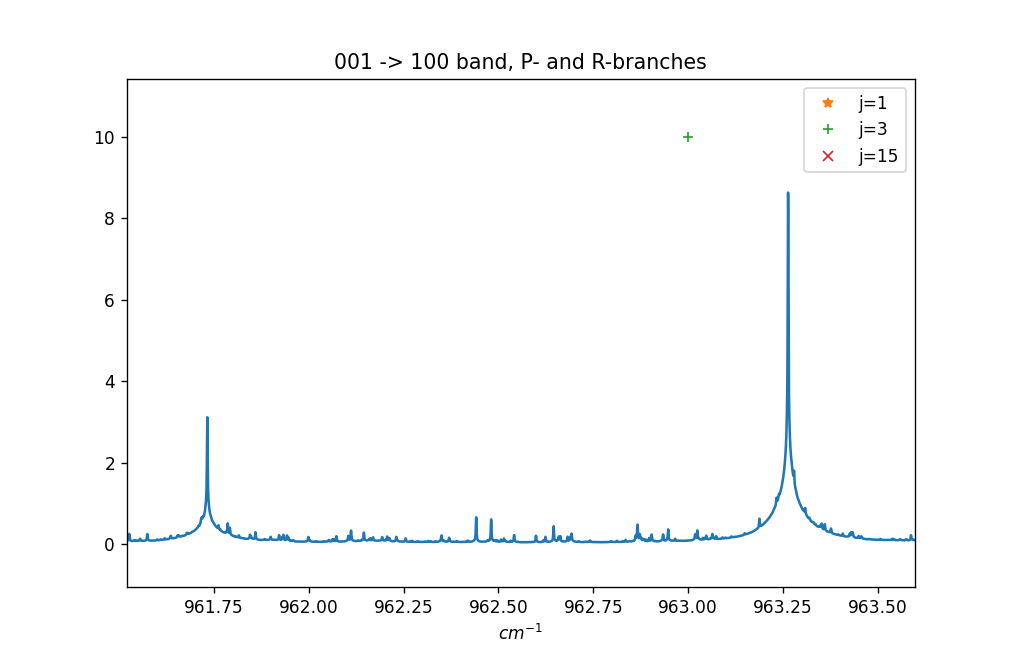

In [12]:
%matplotlib notebook

# This loads part of the spectrum for plotting
band_001_100 = loadtxt('band_001_100.txt')
nu_obs = band_001_100[:,0]
S_obs = band_001_100[:,1]

# Graph it
plt.figure(2)
plt.plot(nu_obs, S_obs)
plt.title('001 -> 100 band, P- and R-branches')

# This labels some of the excited states
plt.plot(961.5,4,'*', label='j=1')
plt.plot(963,10,'+', label='j=3')
plt.plot(972,22,'x', label='j=15')
plt.xlabel('$cm^{-1}$')
plt.legend()

### Pause for Analysis: Rotational constant

1. Using the "zoom" feature, infer a value for the rotational constant of $CO_2$ from the figure above. Remember that $B$ equals 1/4 the spacing between adjacent rovibrational lines.
2. Compare your result to a literature value, e.g., http://cccbdb.nist.gov/exp1x.asp. (Note: use capital letters).
3. You should be aware that assigning a constant value to $B$ is a bit of an approximation. This is evident from the fact that the spacing between lines in the figure is not constant. By approximately how much (in %) does $B$ vary from j=1 to j=15?

In [27]:
# Specify the value of B you got from the figure
# From 961.7 to 977.5 there are 12 lines, so (977.5-961.7)/11/4 = 0.36
B = 0.39 * conversion_to_Joules    # Rotational constant of CO2. Lit value is 0.39021

### Part 2. Calculating the populations of excited rotational states

Now you'll need to lay out a range of J-values. You can get an estimate of how many are present by counting the number of peaks in the R-Branch appearing in the figure above. Don't forget that only every _other_ line is present.

In [28]:
# Lay out a range of J-values from 1 to 40, stepping by 2
# (see previous CGI if you forgot how to do this)
J = arange(1, 40, 2)
print(J)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39]


The next cell has you compute the degeneracy factor $g_J$ and the Boltzmann factor, both needed to determine the population as a function of the rotational quantum number $J$.

<IPython.core.display.Javascript object>


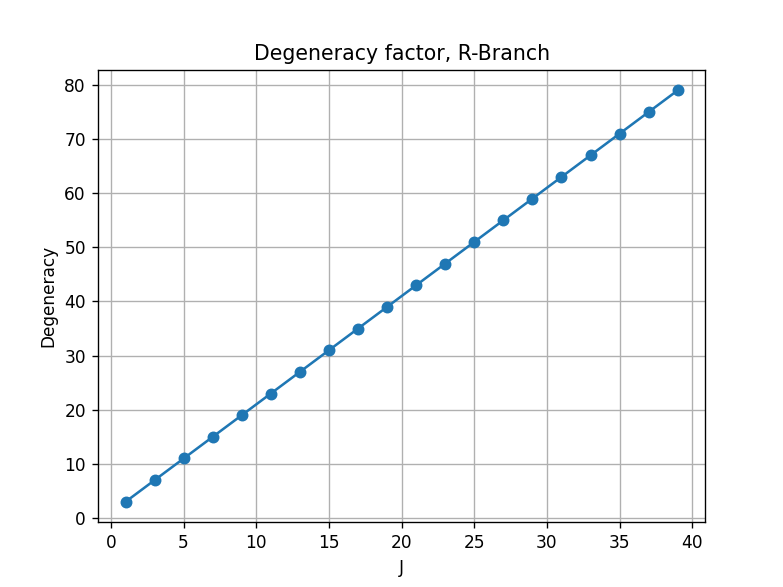

<IPython.core.display.Javascript object>


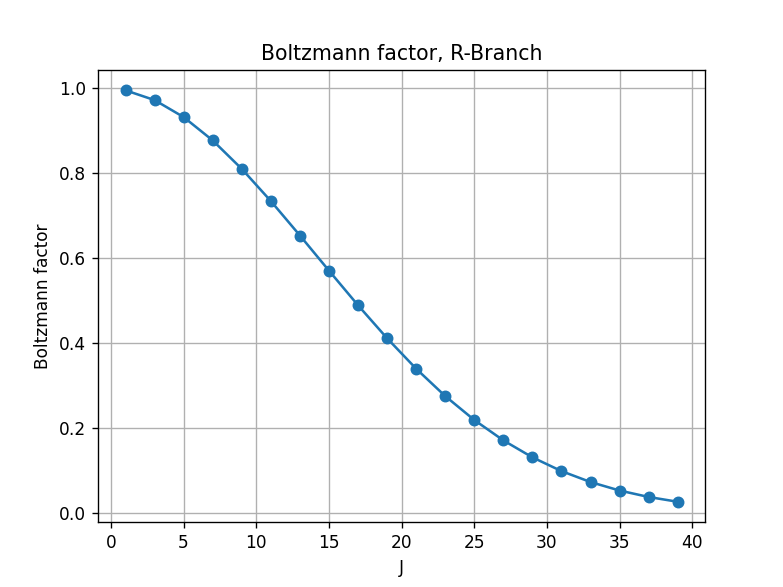

Text(0, 0.5, 'Boltzmann factor')

In [38]:
# Get the degeneracy factor
g_J = 2*J+1

# Plot it
plt.figure(3)
plt.plot(J, g_J, '-o')
plt.title('Degeneracy factor, R-Branch')
plt.grid('on')
plt.xlabel('J')
plt.ylabel('Degeneracy')

# Specify the temperature and compute the Boltzmann factor
T = 240
E_J = B*J*(J+1)
B_factor = exp(-E_J/(k*T))

# Plot it
plt.figure(4); plt.plot(J, B_factor, '-o')
plt.title('Boltzmann factor, R-Branch')
plt.grid('on')
plt.xlabel('J')
plt.ylabel('Boltzmann factor')

### Pause for analysis: Degeneracy and population

1. According to your results above, higher $J$ means greater degeneracy. Speculate as to why this occurs (perhaps with the help of your instructor).
2. Predict what the product function $g_J \space e^{-E_J/kT} $
will look like. Make a sketch in your notebook.

<IPython.core.display.Javascript object>


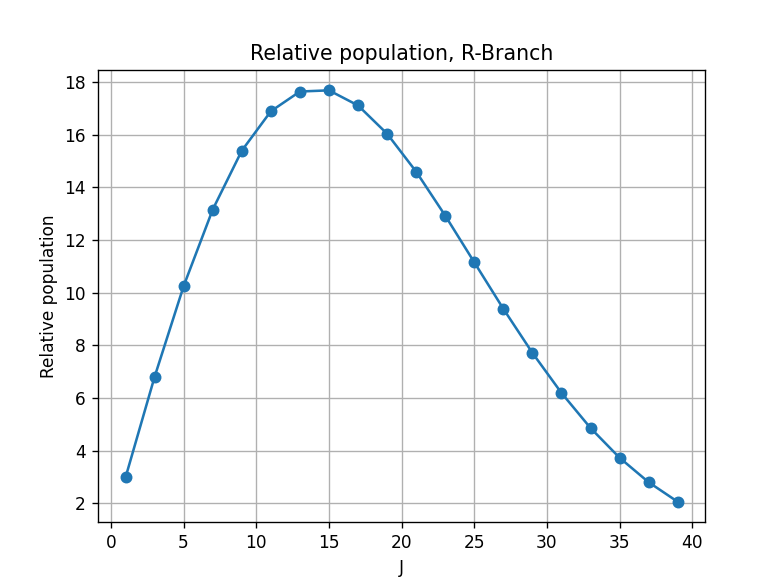

Text(0.5, 0, 'J')

In [39]:
# The product tells us the population of each rotational state
Population = g_J * B_factor
plt.figure(5)
plt.plot(J, Population, '-o')
plt.title('Relative population, R-Branch')
plt.ylabel('Relative population')
plt.grid('on')
plt.xlabel('J')

### Pause for Analysis: Maximum population

1. Re-run the cells above for different temperatures to get a sense of how the maximum population depends on  temperature. 
2. What temperature is required to get the maximum population to coincide with the highest line in the observed spectrum?

### Part 3. Comparing modeled to simulated spectra

<IPython.core.display.Javascript object>


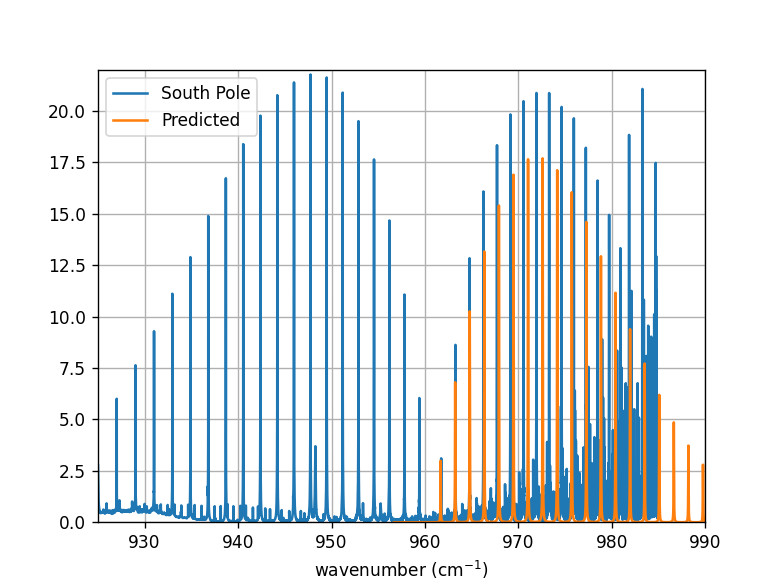

In [41]:
# Re-plot the South Pole spectrum for comparison
plt.figure(6)
plt.plot(nu_obs, S_obs)
plt.xlim([925, 990])
plt.ylim([0, 22])
plt.xlabel('wavenumber (cm$^{-1}$)')


# This graphs the line strengths (in "Population") as a spectrum
# Make sure you have run the cells above with the correct temperature 
# before running this.
plotJstick(J, B, 960.5, Population)
plt.grid('on')
plt.xlabel('wavenumber (cm$^{-1}$)')
plt.xlim([925, 990])
plt.ylim([0, 22])

# Put a legend on the graph
plt.legend(['South Pole', 'Predicted'])

### Pause for Analysis: Matching the spectrum

1. How well do your modeled and observed R-Branches agree?

### Post-activity reflection

1. Make sure you have recorded your Pause for Analysis reflections in your notebook, with appropriate graphs and equations, the value of $B$ and the temperature you determined.  
2. In this activity, we used the height of the lines to determine the temperature. Next we will explore another method to determine the temperature.